In [ ]:
# External
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
# Std
import os
# Local
from lib.functions import show_sample_images
from CGAN import CGanNet

In [ ]:
BATCH_SIZE = 32
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
LEARNING_RATE_DISC: float = 0.0002
LEARNING_RATE_GAN: float = 0.0002
DROPOUT_RATE: float = 0.4
NET_NAME = "Mnist"

In [ ]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# Load and prepare dataset

(trainX, labels), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = trainX.astype('float32') / 255.0

In [ ]:
labels_strings = {_ : _ for _ in [0, 1, 2 ,3 ,4 ,5 ,6 ,7 ,8, 9]}

cgan = CGanNet(net_name=NET_NAME,
               batch_size=BATCH_SIZE,
               image_width=IMAGE_WIDTH,
               image_height=IMAGE_HEIGHT,
               learning_rate_disc= LEARNING_RATE_DISC,
               learning_rate_gan=LEARNING_RATE_GAN,
               dropout_rate= DROPOUT_RATE,
               number_of_channels=1,
               latent_dimension=100,
                training_data=x_train,
                labels_data=labels,
                number_of_classes=10,
                labels_names=labels_strings
)

In [ ]:
# Define GAN models
cgan.define_discriminator()
cgan.define_generator()
cgan.define_gan()

In [ ]:
# cgan.train(number_of_epochs=1, load_past_model=False)

Number of images in dataset: 60000
Batches per epoch: 1875
Half batch size is: 16
----> Load epoch number: 4 from file /home/kamil/Repositories/GAN_mg/Mnist_data/.epoch
------------------------------------------------------------
---> Epoch: 5 1/20
---> Start time is: 20:16:01
1875/1875 [==============================] - 140s 73ms/step
---> End time is: 20:18:21
---> D_real_loss: 0.16440950334072113 D_fake_loss: 0.3976897895336151 G_loss: 4.31862211227417
----> D_real_acc: 0.9375 D_fake_acc: 0.8125
----> Epoch training time: 0.0h 2.0m, 20s
------------------------------------------------------------
---> Epoch: 6 2/20
---> Start time is: 20:18:22
1875/1875 [==============================] - 139s 74ms/step
---> End time is: 20:20:41
---> D_real_loss: 0.24192923307418823 D_fake_loss: 0.026023689657449722 G_loss: 3.688697099685669
----> D_real_acc: 0.875 D_fake_acc: 1.0
----> Epoch training time: 0.0h 2.0m, 19s
------------------------------------------------------------
---> Epoch: 7 3/2

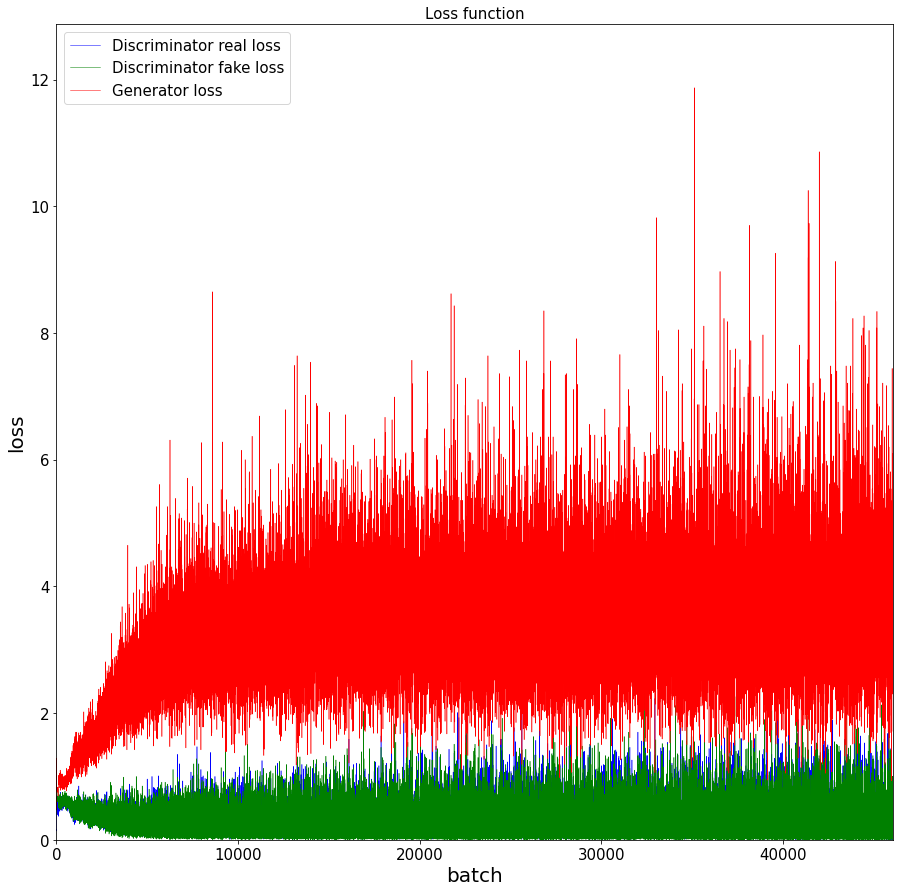

In [7]:
cgan.train(number_of_epochs=20, load_past_model=True)

In [ ]:
cgan.load_model()

In [ ]:
cgan.get_training_time()

In [ ]:
cgan.show_sample_images_with_labels(same=9)

In [ ]:
cgan.show_one_image_with_label(2)